In [2]:
# List of packages used
library(readr)
library(dplyr)
library(randomForest)
library(Hmisc)
library(party)
library(data.table)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(pROC)
library(glmnet)
library(caret)
library(Rtsne)
library(doMC)
library("ROSE")
library(class)
library(naivebayes)
library(ROCR)
library(rpart)
library(ranger)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

At

In [3]:
data <- read.csv("creditcard.csv")


In [3]:
glimpse(data)


Observations: 284,807
Variables: 31
$ Time   <dbl> 0, 0, 1, 1, 2, 2, 4, 7, 7, 9, 10, 10, 10, 11, 12, 12, 12, 13...
$ V1     <dbl> -1.3598071, 1.1918571, -1.3583541, -0.9662717, -1.1582331, -...
$ V2     <dbl> -0.07278117, 0.26615071, -1.34016307, -0.18522601, 0.8777367...
$ V3     <dbl> 2.53634674, 0.16648011, 1.77320934, 1.79299334, 1.54871785, ...
$ V4     <dbl> 1.37815522, 0.44815408, 0.37977959, -0.86329128, 0.40303393,...
$ V5     <dbl> -0.33832077, 0.06001765, -0.50319813, -0.01030888, -0.407193...
$ V6     <dbl> 0.46238778, -0.08236081, 1.80049938, 1.24720317, 0.09592146,...
$ V7     <dbl> 0.239598554, -0.078802983, 0.791460956, 0.237608940, 0.59294...
$ V8     <dbl> 0.098697901, 0.085101655, 0.247675787, 0.377435875, -0.27053...
$ V9     <dbl> 0.3637870, -0.2554251, -1.5146543, -1.3870241, 0.8177393, -0...
$ V10    <dbl> 0.09079417, -0.16697441, 0.20764287, -0.05495192, 0.75307443...
$ V11    <dbl> -0.55159953, 1.61272666, 0.62450146, -0.22648726, -0.8228428...
$ V12    <dbl> -

In [4]:
data$Class <- factor(data$Class)


In [5]:
table(data$Class)


     0      1 
284315    492 

In [6]:
#Creating test and train sets

index <- sample(2,nrow(data),prob = c(0.7,0.3),replace = TRUE)


In [7]:
train <- data[index==1,]
test <- data[index==2,]

In [8]:
table(train$Class)
table(test$Class)


     0      1 
198432    343 


    0     1 
85883   149 

In [9]:
#Building a random forest model using the train data

rfModel <- randomForest(Class ~ . , data = train)

In [10]:
test$predicted <- predict(rfModel, test)


Area under the curve (AUC): 0.852

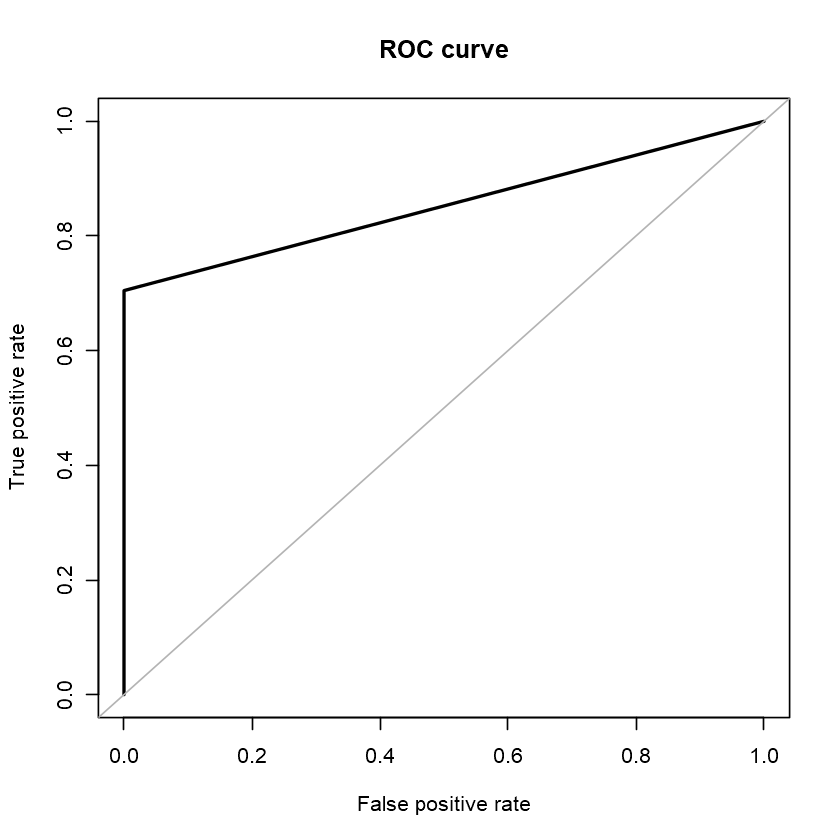

In [27]:
# Area under the curve for the random forest model

roc.curve(test$Class, test$predicted, plotit = T)


In [12]:
library(caret)
confusionMatrix(test$Class, test$predicted)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 85878     5
         1    44   105
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9992, 0.9996)
    No Information Rate : 0.9987          
    P-Value [Acc > NIR] : 5.163e-11       
                                          
                  Kappa : 0.8105          
 Mcnemar's Test P-Value : 5.681e-08       
                                          
            Sensitivity : 0.9995          
            Specificity : 0.9545          
         Pos Pred Value : 0.9999          
         Neg Pred Value : 0.7047          
             Prevalence : 0.9987          
         Detection Rate : 0.9982          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.9770          
                                          
       'Positive' Class : 0               
                                          

In [11]:
# Using the package MLmetrics to use the features like varImpPlot(Variable importance plot)

library(MLmetrics)



Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall



In [12]:
F1_all <- F1_Score(test$Class, test$predicted)
F1_all

[1] 0.9997592

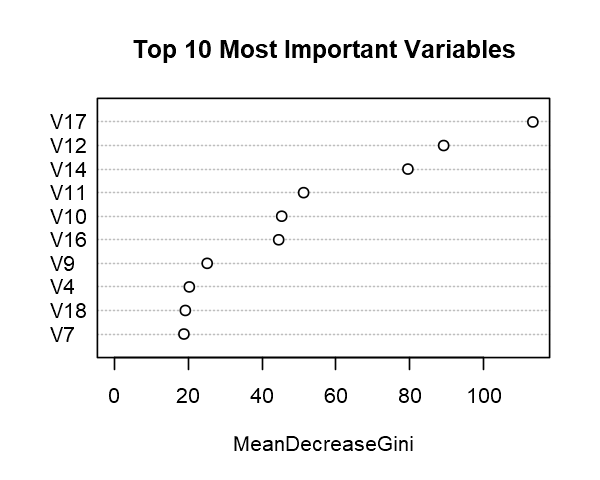

In [13]:
# Feature importance using the random forest and varImpPlot

options(repr.plot.width=5, repr.plot.height=4)
    varImpPlot(rfModel,
          sort = T,
           n.var=10,
           main="Top 10 Most Important Variables")

# Tuning the random forest model using features

In [14]:
rfModelTrim1 <- randomForest(Class ~  V17, 
                            data = train)

test$predictedTrim1 <- predict(rfModelTrim1, test)

F1_1 <- F1_Score(test$Class, test$predictedTrim1)
F1_1

[1] 0.999119

In [15]:
rfModelTrim2 <- randomForest(Class ~  V17 + V12, 
                            data = train)

test$predictedTrim2 <- predict(rfModelTrim2, test)

F1_2 <- F1_Score(test$Class, test$predictedTrim2)
F1_2

[1] 0.9995947

In [16]:
rfModelTrim3 <- randomForest(Class ~  V17 + V12 + V14, 
                            data = train)

test$predictedTrim3 <- predict(rfModelTrim3, test)

F1_3 <- F1_Score(test$Class, test$predictedTrim3)
F1_3

[1] 0.9996946

In [17]:
# four variables
rfModelTrim4 <- randomForest(Class ~  V17 + V12 + V14 + V10, 
                            data = train)

test$predictedTrim4 <- predict(rfModelTrim4, test)

F1_4 <- F1_Score(test$Class, test$predictedTrim4)
F1_4

[1] 0.9997122

In [18]:
# five variables
rfModelTrim5 <- randomForest(Class ~  V17 + V12 + V14 + V10 + V16, 
                            data = train)

test$predictedTrim5 <- predict(rfModelTrim5, test)

F1_5 <- F1_Score(test$Class, test$predictedTrim5)
F1_5

[1] 0.9997298

In [19]:
# ten variables
rfModelTrim10 <- randomForest(Class ~  V17 + V12 + V14 + V10 + V16 
                              + V11 + V9 + V4 + V18 + V26, 
                            data = train)

test$predictedTrim10 <- predict(rfModelTrim10, test)

F1_10 <- F1_Score(test$Class, test$predictedTrim10)
F1_10

[1] 0.9997416

In [20]:
# build dataframe of number of variables and scores
numVariables <- c(1,2,3,4,5,10,17)
F1_Score <- c(F1_1, F1_2, F1_3, F1_4, F1_5, F1_10, F1_all)
variablePerf <- data.frame(numVariables, F1_Score)

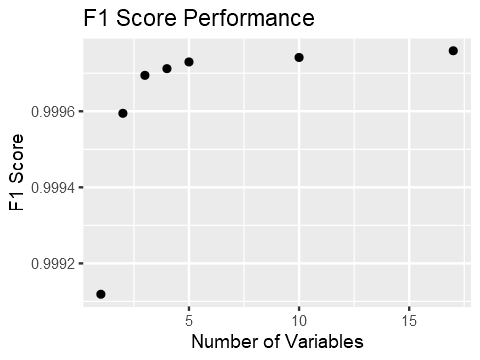

In [21]:
# plot score performance against number of variables
options(repr.plot.width=4, repr.plot.height=3)
ggplot(variablePerf, aes(numVariables, F1_Score)) + geom_point() + labs(x = "Number of Variables", y = "F1 Score", title = "F1 Score Performance")

In [22]:
library("ROSE")

Loaded ROSE 0.0-3



In [23]:
str(train)

'data.frame':	199526 obs. of  31 variables:
 $ Time  : num  0 0 2 2 7 7 10 10 11 12 ...
 $ V1    : num  -1.36 1.192 -1.158 -0.426 -0.644 ...
 $ V2    : num  -0.0728 0.2662 0.8777 0.9605 1.418 ...
 $ V3    : num  2.536 0.166 1.549 1.141 1.074 ...
 $ V4    : num  1.378 0.448 0.403 -0.168 -0.492 ...
 $ V5    : num  -0.338 0.06 -0.407 0.421 0.949 ...
 $ V6    : num  0.4624 -0.0824 0.0959 -0.0297 0.4281 ...
 $ V7    : num  0.2396 -0.0788 0.5929 0.4762 1.1206 ...
 $ V8    : num  0.0987 0.0851 -0.2705 0.2603 -3.8079 ...
 $ V9    : num  0.364 -0.255 0.818 -0.569 0.615 ...
 $ V10   : num  0.0908 -0.167 0.7531 -0.3714 1.2494 ...
 $ V11   : num  -0.552 1.613 -0.823 1.341 -0.619 ...
 $ V12   : num  -0.618 1.065 0.538 0.36 0.291 ...
 $ V13   : num  -0.991 0.489 1.346 -0.358 1.758 ...
 $ V14   : num  -0.311 -0.144 -1.12 -0.137 -1.324 ...
 $ V15   : num  1.468 0.636 0.175 0.518 0.686 ...
 $ V16   : num  -0.4704 0.4639 -0.4514 0.4017 -0.0761 ...
 $ V17   : num  0.208 -0.1148 -0.237 -0.0581 -1.2221 ...

In [24]:
table(train$Class)
table(test$Class)


     0      1 
199192    334 


    0     1 
85123   158 

In [25]:
prop.table(table(train$Class))


          0           1 
0.998326033 0.001673967 

In [26]:
library("rpart")


Attaching package: 'rpart'

The following object is masked from 'package:survival':

    solder



In [27]:
credit_tree <- rpart(Class ~ . , data = train)

In [28]:
pred_credit_tree <- predict(credit_tree, newdata = test)

Area under the curve (AUC): 0.908

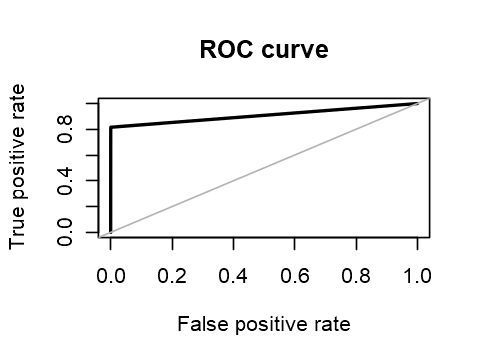

In [31]:
# Area under the curve for rpart model

roc.curve(test$Class, pred_credit_tree[,2], plotit = T)


In [32]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = train, method = "over",N = 300000)$data

table(data_balanced_over$Class)


     0      1 
199192 100808 

In [33]:
#under sampling
data_balanced_under <- ovun.sample(Class ~ ., data = train, method = "under", N = 30000, seed = 1)$data

table(data_balanced_under$Class)


    0     1 
29666   334 

In [34]:
data_balanced_both <- ovun.sample(Class ~ ., data = train, method = "both", p=0.5,N=10000, seed = 1)$data
table(data_balanced_both$Class)


   0    1 
5047 4953 

In [49]:
data.rose <- ROSE(Class ~ ., data = train, seed = 1,N = 100000)$data
table(data.rose$Class)


    0     1 
50008 49992 

In [50]:
#building decision tree models

tree.rose <- rpart(Class ~ ., data = data.rose)
tree.over <- rpart(Class ~ ., data = data_balanced_over)
tree.under <- rpart(Class ~ ., data = data_balanced_under)
tree.both <- rpart(Class ~ ., data = data_balanced_both)

In [51]:
# predictions on unseen data
pred.tree.rose <- predict(tree.rose, newdata = test)
pred.tree.over <- predict(tree.over, newdata = test)
pred.tree.under <- predict(tree.under, newdata = test)
pred.tree.both <- predict(tree.both, newdata = test)

Area under the curve (AUC): 0.943

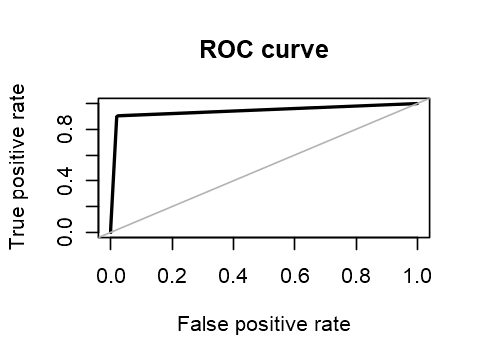

In [52]:
# AUC for rpart model using rose data

roc.curve(test$Class, pred.tree.rose[,2])

Area under the curve (AUC): 0.941

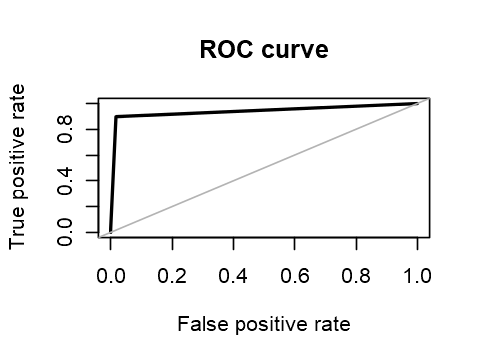

In [53]:
# AUC for rpart model using over-sampling data


roc.curve(test$Class, pred.tree.over[,2])

Area under the curve (AUC): 0.935

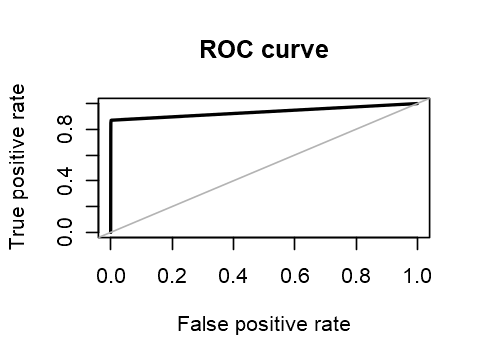

In [54]:
# AUC for rpart model using under-sampling data

roc.curve(test$Class, pred.tree.under[,2])

Area under the curve (AUC): 0.965

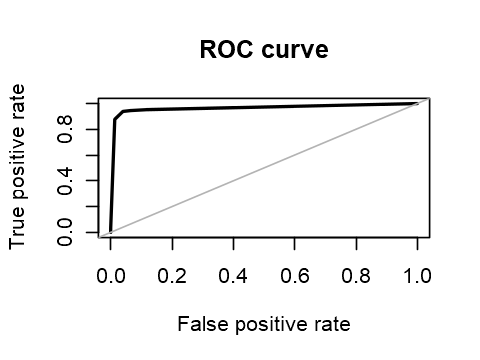

In [55]:
# AUC for rpart model using both oversampling and undersampling data

roc.curve(test$Class, pred.tree.both[,2])